In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.0 MB/s eta 0:00:00


In [ ]:
# 1_data_generation.ipynb

import pandas as pd
import numpy as np
import random
from faker import Faker
import matplotlib.pyplot as plt

NUM_RECORDS = 10000
ANOMALY_PERCENT = 0.05
NULL_PERCENT = 0.05
REPEAT_PERCENT = 0.05

faker = Faker()

def generate_transaction(i):
    return {
        "transaction_id": i + 1,
        "customer_id": random.randint(1000,9999),
        "account_no": random.randint(10**9,10**10-1),
        "channel": random.choice(["Online","ATM","Branch","Mobile"]),
        "transaction_amount": random.randint(10,5000),
        "payee_account_no": random.randint(10**9,10**10-1),
        "transaction_type": random.choice(["Credit","Debit"]),
        "currency_code": random.choice(["USD","EUR","GBP"]),
        "country_code": random.choice(["US","GB","DE","FR"]),
        "location": faker.city(),
        "account_type": random.choice(["Savings","Current","Loan"]),
        "transaction_time": faker.date_time_this_year(),
        "account_status": random.choice(["Active","Suspended"]),
        "customer_address": faker.address(),
        "is_anomaly": 0
    }

# Generate
data = [generate_transaction(i) for i in range(NUM_RECORDS)]
df = pd.DataFrame(data)

# Inject anomalies
anomaly_idx = np.random.choice(df.index, int(NUM_RECORDS * ANOMALY_PERCENT), replace=False)
df.loc[anomaly_idx, "transaction_amount"] *= 20
df.loc[anomaly_idx, "is_anomaly"] = 1

# Inject nulls
for col in ["channel","currency_code","location"]:
    null_idx = np.random.choice(df.index, int(NUM_RECORDS * NULL_PERCENT), replace=False)
    df.loc[null_idx, col] = None

# Repeat anomalous customers
repeat_customers = df.loc[anomaly_idx, "customer_id"].unique()
repeats = df[df["customer_id"].isin(repeat_customers)].sample(frac=REPEAT_PERCENT, replace=True)
df = pd.concat([df, repeats]).reset_index(drop=True)

# Save
df.to_csv("bank_transactions.csv", index=False)

# Display sample
df.head()


,transaction_id,customer_id,account_no,channel,transaction_amount,payee_account_no,transaction_type,currency_code,country_code,location,account_type,transaction_time,account_status,customer_address,is_anomaly
0,1,5977,2932033650,ATM,3927,5403476690,Credit,EUR,FR,Woodmouth,Loan,2025-04-09 09:04:33.097201,Active,"0390 Sandoval Way Suite 925\nNorth Tinaview, H...",0
1,2,8350,8439213922,Mobile,826,6903777326,Credit,GBP,FR,Tammymouth,Current,2025-03-09 00:46:12.034616,Suspended,"05613 Troy Green Apt. 950\nBarronchester, MP 3...",0
2,3,4794,8402894937,ATM,631,3353247112,Credit,EUR,FR,Karimouth,Savings,2025-06-19 16:54:30.627898,Suspended,USCGC Jones\nFPO AP 67063,0
3,4,5589,2913885234,Branch,617,5101842384,Debit,EUR,GB,Simmonstown,Savings,2025-05-29 23:34:02.380498,Suspended,USCGC Wilkins\nFPO AE 26806,0
4,5,8915,7310124534,ATM,3957,7439894536,Credit,EUR,GB,Delgadoborough,Savings,2025-03-11 00:44:35.178745,Suspended,"629 Jeffrey Forest\nCarolinemouth, NV 32811",0


Data Preprocessing

/tmp/ipython-input-10-3966726295.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)



Numeric columns types:
 transaction_amount    int64
customer_id           int64
account_no            int64
payee_account_no      int64
dtype: object


,count,mean,std,min,25%,50%,75%,max
transaction_amount,10049.0,5.024383e+03,1.259199e+04,1.000000e+01,1.324000e+03,2.641000e+03,3.967000e+03,9.968000e+04
customer_id,10049.0,5.526739e+03,2.600155e+03,1.000000e+03,3.285000e+03,5.526000e+03,7.757000e+03,9.998000e+03
account_no,10049.0,5.475711e+09,2.590048e+09,1.002020e+09,3.215613e+09,5.474788e+09,7.658888e+09,9.999085e+09
payee_account_no,10049.0,5.515121e+09,2.579197e+09,1.000231e+09,3.299628e+09,5.527031e+09,7.735442e+09,9.999678e+09
transaction_amount_scaled,10049.0,-2.828312e-17,1.000050e+00,-3.982398e-01,-2.938826e-01,-1.892871e-01,-8.397681e-02,7.517502e+00
customer_id_scaled,10049.0,-1.456581e-16,1.000050e+00,-1.741037e+00,-8.621989e-01,-2.842965e-04,8.577842e-01,1.719699e+00
account_no_scaled,10049.0,-1.392944e-16,1.000050e+00,-1.727348e+00,-8.726521e-01,-3.562933e-04,8.429519e-01,1.746531e+00
payee_account_no_scaled,10049.0,-1.281579e-16,1.000050e+00,-1.750589e+00,-8.590284e-01,4.618054e-03,8.609001e-01,1.738828e+00


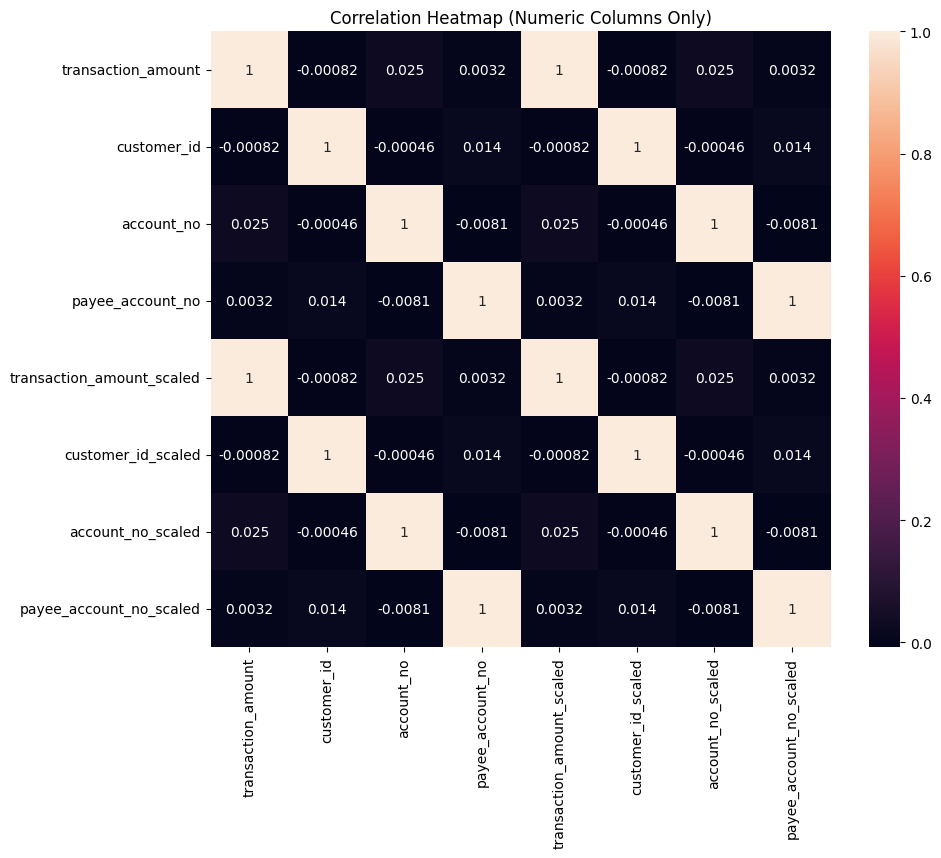

,transaction_id,customer_id,account_no,channel,transaction_amount,payee_account_no,transaction_type,currency_code,country_code,location,account_type,transaction_time,account_status,customer_address,is_anomaly,transaction_amount_scaled,customer_id_scaled,account_no_scaled,payee_account_no_scaled
0,1,5977,2932033650,0,3927,5403476690,0,0,1,7423,1,2025-04-09 09:04:33.097201,0,"0390 Sandoval Way Suite 925\nNorth Tinaview, H...",0,-0.087154,0.173176,-0.982146,-0.043289
1,2,8350,8439213922,2,826,6903777326,0,1,1,6498,0,2025-03-09 00:46:12.034616,1,"05613 Troy Green Apt. 950\nBarronchester, MP 3...",0,-0.333433,1.085859,1.144245,0.538433
2,3,4794,8402894937,0,631,3353247112,0,0,1,2385,2,2025-06-19 16:54:30.627898,1,USCGC Jones\nFPO AP 67063,0,-0.348920,-0.281820,1.130222,-0.838238
3,4,5589,2913885234,1,617,5101842384,1,0,2,5835,2,2025-05-29 23:34:02.380498,1,USCGC Wilkins\nFPO AE 26806,0,-0.350032,0.023946,-0.989153,-0.160243
4,5,8915,7310124534,0,3957,7439894536,0,0,2,921,2,2025-03-11 00:44:35.178745,1,"629 Jeffrey Forest\nCarolinemouth, NV 32811",0,-0.084771,1.303164,0.708290,0.746306


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("bank_transactions.csv", parse_dates=["transaction_time"])

# Fill nulls
for col in ["channel", "currency_code", "location"]:
    df[col].fillna("Unknown", inplace=True)

# Encode categoricals
categorical_cols = [
    "channel",
    "transaction_type",
    "currency_code",
    "country_code",
    "location",
    "account_type",
    "account_status"
]
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# ✅ Only numeric columns
numeric_cols = [
    "transaction_amount",
    "customer_id",
    "account_no",
    "payee_account_no"
]

# Confirm
print("\nNumeric columns types:\n", df[numeric_cols].dtypes)

# Scale numeric columns
scaler = StandardScaler()
scaled = scaler.fit_transform(df[numeric_cols])

# Append scaled columns
scaled_df = pd.DataFrame(scaled, columns=[f"{c}_scaled" for c in numeric_cols])
df = pd.concat([df, scaled_df], axis=1)

# ✅ Save preprocessed
df.to_csv("preprocessed_transactions.csv", index=False)

# ✅ Show stats *only for numeric columns*
stats = df[numeric_cols + [f"{c}_scaled" for c in numeric_cols]].describe().T
display(stats)

# ✅ Correlation heatmap *only for numeric columns*
corr_cols = numeric_cols + [f"{c}_scaled" for c in numeric_cols]
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

# ✅ Display first rows
df.head()


Feature Engineering

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("preprocessed_transactions.csv", parse_dates=["transaction_time"])

df.sort_values(["customer_id","transaction_time"], inplace=True)

# Time features
df["hour"] = df["transaction_time"].dt.hour
df["day_of_week"] = df["transaction_time"].dt.weekday

# Geolocation
df["is_high_risk_country"] = df["country_code"].isin([1]).astype(int)  # "NG" mapped to 1

# Device/Channel
df["channel_encoded"] = LabelEncoder().fit_transform(df["channel"])

# Customer Behaviour
df["avg_txn_amt"] = df.groupby("customer_id")["transaction_amount"].transform("mean")
df["txn_amt_deviation"] = df["transaction_amount"] - df["avg_txn_amt"]

# Risk Flags
df["is_large_txn"] = (df["transaction_amount"] > 10000).astype(int)
df["is_night_txn"] = df["hour"].isin([0,1,2,3,4,5]).astype(int)

# Time Window Aggregates (example: last 7 days count)
df["txn_count_last_7d"] = 0
txn_times = df.groupby("customer_id")["transaction_time"].apply(list).to_dict()

for idx,row in df.iterrows():
    ts = pd.Series(txn_times[row["customer_id"]])
    count_7d = ((row["transaction_time"] - ts)<=pd.Timedelta(days=7)).sum()-1
    df.at[idx,"txn_count_last_7d"] = count_7d

# Save
df.to_csv("feature_engineered_transactions.csv", index=False)

df.head()


,transaction_id,customer_id,account_no,channel,transaction_amount,payee_account_no,transaction_type,currency_code,country_code,location,...,payee_account_no_scaled,hour,day_of_week,is_high_risk_country,channel_encoded,avg_txn_amt,txn_amt_deviation,is_large_txn,is_night_txn,txn_count_last_7d
8283,8284,1000,8946023401,4,2469,4149870276,1,0,2,5619,...,-0.529358,23,4,0,4,2469.0,0.0,0,0,0
3162,3163,1004,7979765669,0,1288,9804260854,1,1,0,6894,...,1.663058,6,2,0,0,1288.0,0.0,0,0,0
950,951,1006,1985913589,0,2947,1730654677,1,0,0,755,...,-1.467377,9,2,0,0,2947.0,0.0,0,0,0
6079,6080,1007,7766261393,0,1440,4033843478,0,1,3,2485,...,-0.574346,0,0,0,0,1550.0,-110.0,0,1,3
4004,4005,1007,1023483329,1,21,2151604077,1,2,1,7206,...,-1.304159,18,2,1,1,1550.0,-1529.0,0,0,2


Phase 4: Anomaly Detection

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.9262
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5069
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3914
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3685
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3317
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2923
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2199
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1780
Epoch 9/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1797
Epoch 10/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1496
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


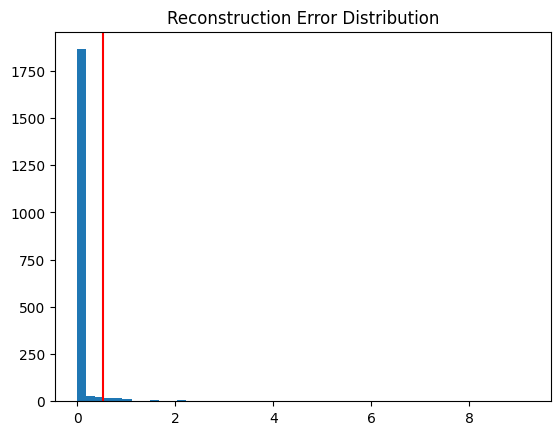

,transaction_id,customer_id,account_no,channel,transaction_amount,payee_account_no,transaction_type,currency_code,country_code,location,...,hour,day_of_week,is_high_risk_country,channel_encoded,avg_txn_amt,txn_amt_deviation,is_large_txn,is_night_txn,txn_count_last_7d,iso_anomaly
0,8284,1000,8946023401,4,2469,4149870276,1,0,2,5619,...,23,4,0,4,2469.0,0.0,0,0,0,0
1,3163,1004,7979765669,0,1288,9804260854,1,1,0,6894,...,6,2,0,0,1288.0,0.0,0,0,0,0
2,951,1006,1985913589,0,2947,1730654677,1,0,0,755,...,9,2,0,0,2947.0,0.0,0,0,0,0
3,6080,1007,7766261393,0,1440,4033843478,0,1,3,2485,...,0,0,0,0,1550.0,-110.0,0,1,3,0
4,4005,1007,1023483329,1,21,2151604077,1,2,1,7206,...,18,2,1,1,1550.0,-1529.0,0,0,2,0


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("feature_engineered_transactions.csv")

X = df[["transaction_amount_scaled","txn_amt_deviation","avg_txn_amt","hour"]].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_preds = iso.fit_predict(X_scaled)
df["iso_anomaly"] = (iso_preds==-1).astype(int)

# LSTM
X_train,X_test = train_test_split(X_scaled,test_size=0.2)
X_train_r = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_r = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

inputs = layers.Input(shape=(X_train_r.shape[1],1))
encoded = layers.LSTM(8,activation="relu")(inputs)
decoded = layers.RepeatVector(X_train_r.shape[1])(encoded)
decoded = layers.LSTM(8,return_sequences=True)(decoded)
outputs = layers.TimeDistributed(layers.Dense(1))(decoded)

autoencoder = Model(inputs,outputs)
autoencoder.compile(optimizer="adam",loss="mse")
autoencoder.fit(X_train_r,X_train_r,epochs=10,batch_size=32)

recon = autoencoder.predict(X_test_r)
mse = np.mean((X_test_r - recon)**2,axis=(1,2))
threshold = np.percentile(mse,95)
lstm_preds = (mse>threshold).astype(int)

plt.hist(mse,bins=50)
plt.axvline(threshold,color="red")
plt.title("Reconstruction Error Distribution")
plt.show()

df.head()


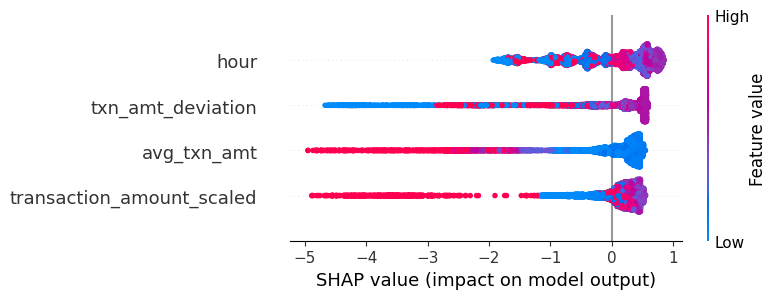

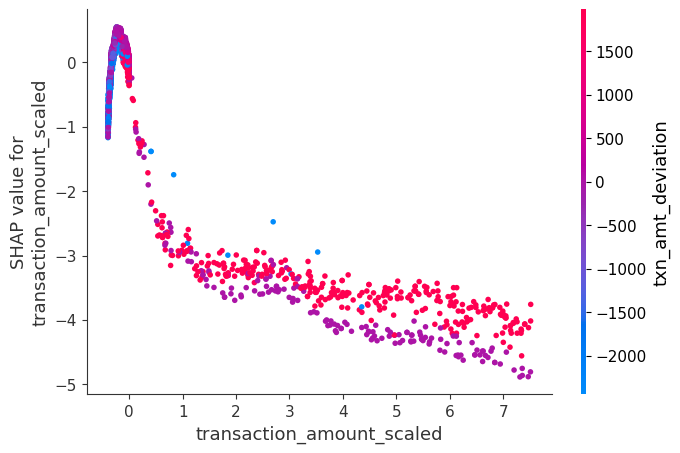

In [ ]:
import shap
explainer = shap.Explainer(iso)
shap_values = explainer(X_scaled)

shap.summary_plot(shap_values,X)
shap.dependence_plot(0,shap_values.values,X)


In [ ]:
rules = []
for i,row in df.iterrows():
    r=[]
    if row["transaction_amount"] > 10000: r.append("Large Txn")
    if row["is_high_risk_country"]: r.append("High Risk Country")
    if row["is_night_txn"]: r.append("Night Txn")
    rules.append(", ".join(r) if r else "No Rule")
df["adaptive_rule"] = rules
df.to_csv("anomaly_results.csv",index=False)
df[["transaction_id","iso_anomaly","adaptive_rule"]].head()


,transaction_id,iso_anomaly,adaptive_rule
0,8284,0,No Rule
1,3163,0,No Rule
2,951,0,No Rule
3,6080,0,Night Txn
4,4005,0,High Risk Country
